<a href="https://colab.research.google.com/github/KosarBehnia/YOLOv8_object_detection/blob/main/YOLO_based_detection_Video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
['pedestrian', 'people', 'bicycle', 'car', 'van', 'truck', 'tricycle', 'awning-tricycle', 'bus', 'motor']

['pedestrian',
 'people',
 'bicycle',
 'car',
 'van',
 'truck',
 'tricycle',
 'awning-tricycle',
 'bus',
 'motor']

In [8]:
!pip install ultralyticsplus==0.0.28 ultralytics==8.0.43


In [11]:
from ultralyticsplus import YOLO, render_result

# load model
model = YOLO('mshamrai/yolov8n-visdrone')

# set model parameters
model.overrides['conf'] = 0.25  # NMS confidence threshold
model.overrides['iou'] = 0.45  # NMS IoU threshold
model.overrides['agnostic_nms'] = False  # NMS class-agnostic
model.overrides['max_det'] = 1000  # maximum number of detections per image



In [32]:
import cv2
import time
cap = cv2.VideoCapture('cars1.mp4')

In [33]:
writer = None
(W, H) = (None, None)
# try to determine the total number of frames in the video file
try:
	total = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
	print("[INFO] {} total frames in video".format(length))
# an error occurred while trying to determine the total
# number of frames in the video file
except:
	print("[INFO] could not determine # of frames in video")
	print("[INFO] no approx. completion time can be provided")
	total = -1

[INFO] 489 total frames in video


In [35]:
# loop over frames from the video file stream
frame = 0
idx = 0
while True:
 # read the next frame from the file
 (grabbed, frame) = cap.read()
 # if the frame was not grabbed, then we have reached the end
 # of the stream
 if not grabbed:
		break
 # if the frame dimensions are empty, grab them
 if W is None or H is None:
		(H, W) = frame.shape[:2]
 #blob= cv2.dnn.blobFromImage(frame, 1 / 255.0, (416, 416),   swapRB=True, crop=False)
 start = time.time()
 results = model.predict(frame)
 end = time.time()
 #print(results[0].boxes)
 #print(results[0].boxes)
 boxes = results[0].boxes.xyxy.cpu().numpy()
 idx = boxes.shape[0]
 #(x, y) = (boxes[1,0], boxes[1,1])
 #print(idx)
 #print(x)
 #print(y)
 #print(boxes)
 if idx > 0:
   for i in range(idx):
         (x) = (int(boxes[i,0]), int(boxes[i,1]))
         (y) = (int(boxes[i,2]), int(boxes[i,3]))
         #print(y)
         cv2.rectangle(frame, x, y, (255,0,0), 2)

 #cv2.rectangle(frame, results[0].boxes,  2)
   if writer is None:
		# initialize our video writer
		     fourcc = cv2.VideoWriter_fourcc(*"MJPG")
		     writer = cv2.VideoWriter('cars1.mp4', fourcc, 30,(frame.shape[1], frame.shape[0]), True)
   writer.write(frame)
          #if total > 0:
		# initialize our video writer
		      # elap = (end - start)
		      # print("[INFO] single frame took {:.4f} seconds".format(elap))
		       #print("[INFO] estimated total time to finish: {:.4f}".format(elap * total))



print("[INFO] cleaning up...")
writer.release()






0: 384x640 4 pedestrians, 1 car, 130.7ms
Speed: 1.0ms preprocess, 130.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 3 pedestrians, 1 car, 132.3ms
Speed: 1.3ms preprocess, 132.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 5 pedestrians, 1 car, 123.0ms
Speed: 1.1ms preprocess, 123.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 5 pedestrians, 1 car, 124.6ms
Speed: 0.8ms preprocess, 124.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 3 pedestrians, 1 car, 127.2ms
Speed: 0.9ms preprocess, 127.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 3 pedestrians, 1 car, 122.1ms
Speed: 1.2ms preprocess, 122.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 pedestrians, 1 car, 1 truck, 126.8ms
Speed: 0.9ms preprocess, 126.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640

[INFO] cleaning up...


tensor([[5.62000e+02, 1.83000e+02, 8.28000e+02, 2.67000e+02, 6.58254e-01, 3.00000e+00],
        [8.40000e+01, 1.66000e+02, 9.30000e+01, 1.82000e+02, 2.60927e-01, 0.00000e+00]])
2
84.0
166.0
[[        562         183         828         267]
 [         84         166          93         182]]
(828, 267)


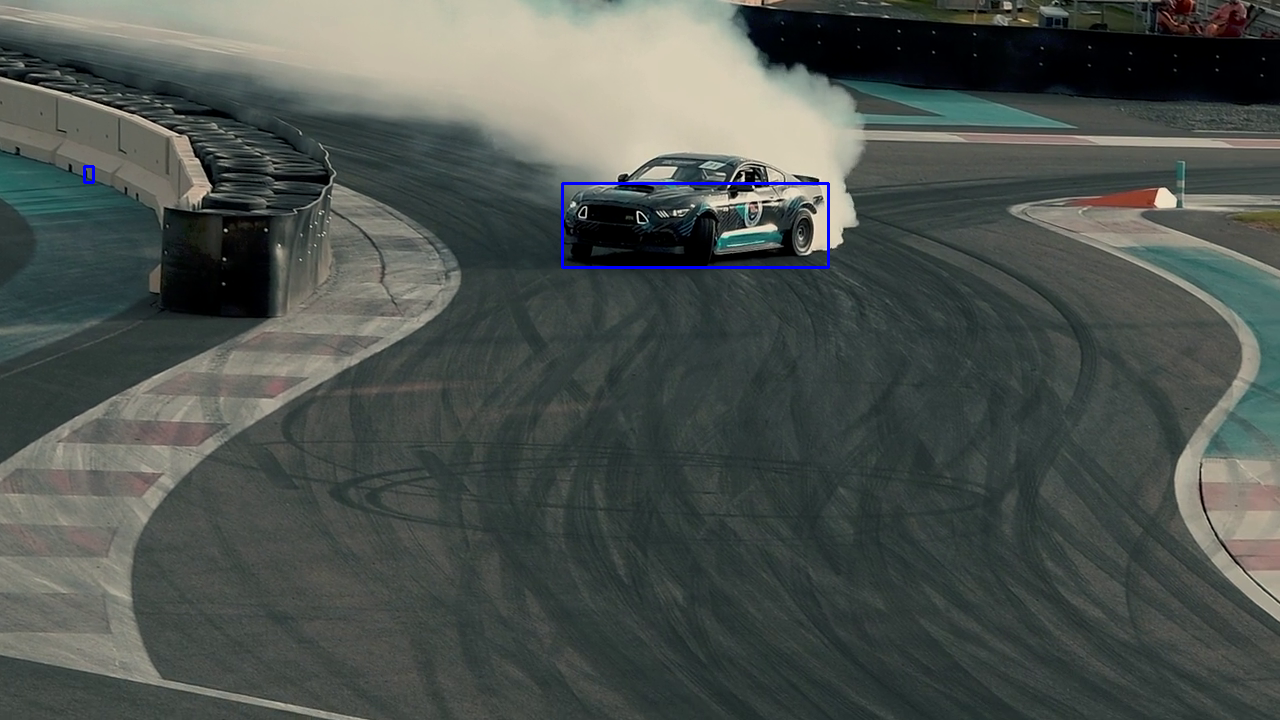

(93, 182)


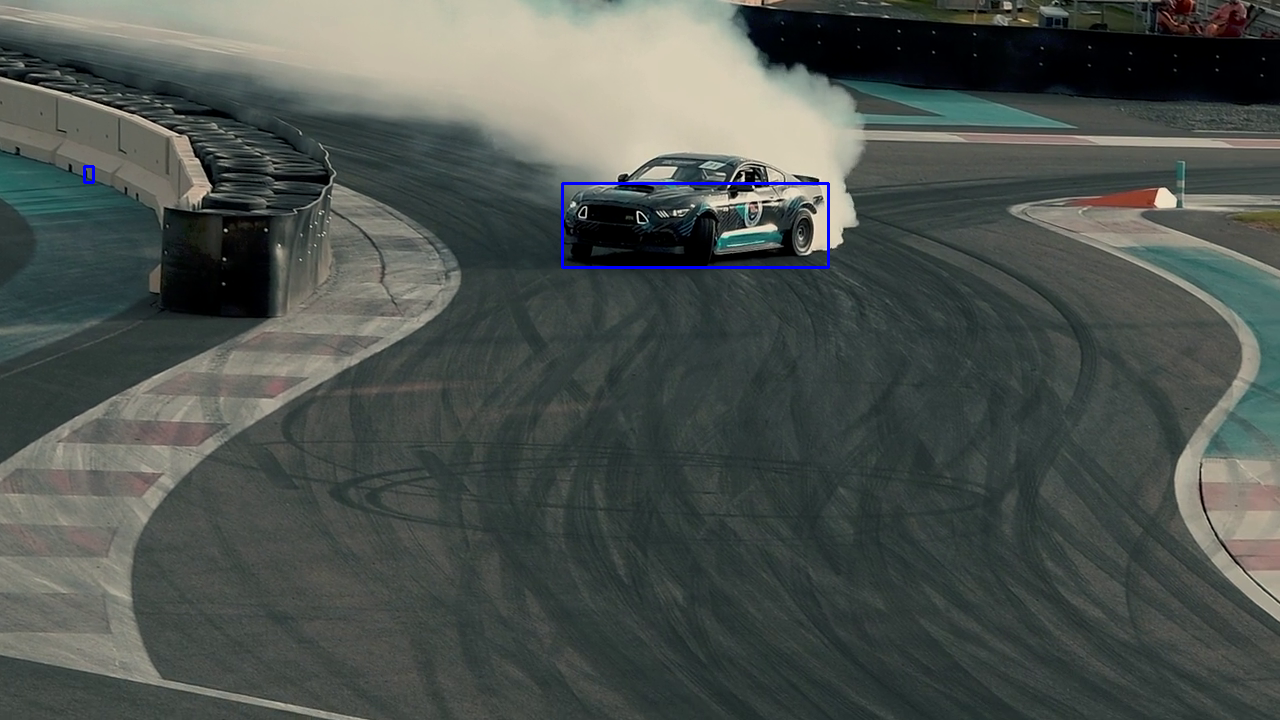

In [120]:
 from google.colab.patches import cv2_imshow

         cv2_imshow(frame)





